In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

2025-07-07 13:24:34.114542: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 13:24:34.143550: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 13:24:34.144561: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-07 13:24:34.702922: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = pd.read_csv("/home/mbc/thesissatria/Dataset/CICIOT2023 10%.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644785 entries, 0 to 4644784
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [4]:
print("Ukuran Dataset Sebelum Drop Duplikat dan Missing Value:")
dataset.shape

Ukuran Dataset Sebelum Drop Duplikat dan Missing Value:


(4644785, 47)

In [5]:
dups = dataset[dataset.duplicated()]
print(f'Jumlah Duplikat: {len(dups)}')

Jumlah Duplikat: 1016288


In [6]:
missing_val = dataset.isna().sum()
print(missing_val.loc[missing_val > 0])

numeric_cols = dataset.select_dtypes(include = np.number).columns
inf_count = np.isinf(dataset[numeric_cols]).sum()
print(inf_count[inf_count > 0])

print(f'Nilai Hilang {dataset.isna().sum().sum()}')

Series([], dtype: int64)
Series([], dtype: int64)
Nilai Hilang 0


In [7]:
print("Ukuran Dataset Sesudah Drop Duplikat:")
dataset.drop_duplicates(inplace = True)
dataset.shape

Ukuran Dataset Sesudah Drop Duplikat:


(3628497, 47)

In [8]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
flow_duration,3628497.0,7.262128e+00,3.572646e+02,0.000000,0.000000e+00,1.471646e-02,2.321104e-01,3.943572e+05
Header_Length,3628497.0,9.806340e+04,5.193580e+05,0.000000,5.400000e+01,7.180000e+01,1.375600e+04,9.831137e+06
Protocol Type,3628497.0,1.013753e+01,9.241353e+00,0.000000,6.000000e+00,6.000000e+00,1.684000e+01,4.700000e+01
Duration,3628497.0,6.701270e+01,1.581392e+01,0.000000,6.400000e+01,6.400000e+01,6.400000e+01,2.550000e+02
Rate,3628497.0,8.175986e+03,8.229015e+04,0.000000,2.199599e+00,1.893450e+01,8.567235e+02,8.388608e+06
Srate,3628497.0,8.175986e+03,8.229015e+04,0.000000,2.199599e+00,1.893450e+01,8.567235e+02,8.388608e+06
Drate,3628497.0,7.574012e-06,7.216875e-03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.336830e+01
fin_flag_number,3628497.0,6.010092e-02,2.376738e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
syn_flag_number,3628497.0,2.288151e-01,4.200700e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
rst_flag_number,3628497.0,6.517850e-02,2.468406e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [9]:
print("Jumlah Serangan Pada Dataset:")
dataset['Attack Type'].value_counts()

Jumlah Serangan Pada Dataset:


Attack Type
DDoS              2450879
DoS                737933
Mirai              242315
BENIGN             109198
Network Attack      53730
Recon               31732
Brute Force          1288
Injection            1114
Malware               308
Name: count, dtype: int64

In [10]:
label_map = {
        'BENIGN': 0, 'DDoS': 1, 'DoS': 2, 'Mirai': 3,
        'Network Attack': 4, 'Recon': 5, 'Brute Force': 6,
        'Injection': 7, 'Malware': 8,
    }
dataset["Attack Type"] = dataset["Attack Type"].map(label_map)

In [11]:
selected_features = [
    'IAT', 'Weight', 'Min', 'rst_count', 'AVG', 
    'Number', 'urg_count','Variance', 'Protocol Type', 'fin_count',
    'ICMP', 'SSH', 'Magnitue', 'fin_flag_number', 'Tot sum', 
    'syn_flag_number', 'TCP', 'HTTPS', 'flow_duration', 'Header_Length'
]

In [12]:
features = dataset[selected_features]
labels = dataset["Attack Type"]

In [13]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [15]:
print("X_train:",x_train.shape)
print("y_train:",y_train.shape)

print("X_test:",x_test.shape)
print("y_test:",y_test.shape)

X_train: (2902797, 20)
y_train: (2902797,)
X_test: (725700, 20)
y_test: (725700,)


In [16]:
# Mengubah label menjadi format kategori
y_train_cat = to_categorical(y_train, num_classes=9)
y_test_cat = to_categorical(y_test, num_classes=9)

In [17]:
# Membuat model Deep Neural Network
model = Sequential()

# Menambahkan layer input dan hidden layers
model.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
# Menambahkan layer output
model.add(Dense(units=9, activation='softmax'))  # 9 kelas

# Menyusun model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_data=(x_test, y_test_cat))

# Evaluasi model
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Prediksi menggunakan model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan confusion matrix dan classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


2025-07-07 13:25:10.839639: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-07 13:25:10.840007: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
45357/45357 [==============================] - 53s 1ms/step - loss: 0.1289 - accuracy: 0.9494 - val_loss: 0.0440 - val_accuracy: 0.9853
Epoch 2/5
45357/45357 [==============================] - 52s 1ms/step - loss: 0.0484 - accuracy: 0.9836 - val_loss: 0.0351 - val_accuracy: 0.9870
Epoch 3/5
45357/45357 [==============================] - 52s 1ms/step - loss: 0.0372 - accuracy: 0.9863 - val_loss: 0.0520 - val_accuracy: 0.9800
Epoch 4/5
45357/45357 [==============================] - 52s 1ms/step - loss: 0.0348 - accuracy: 0.9871 - val_loss: 0.0335 - val_accuracy: 0.9874
Epoch 5/5
22679/22679 [==============================] - 18s 801us/step - loss: 0.0321 - accuracy: 0.9877
Test Loss: 0.032053444534540176
Test Accuracy: 0.9877098202705383
22679/22679 [==============================] - 15s 657us/step
Confusion Matrix:
[[ 21177      3      0      0    603    277      0      0      0]
 [     0 489525    120      5     39      3      0      0      0]
 [     1    324 147389      1   

/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.79      0.96      0.86     22060
           1       1.00      1.00      1.00    489692
           2       1.00      1.00      1.00    147768
           3       1.00      1.00      1.00     48629
           4       0.79      0.64      0.71     10779
           5       0.81      0.51      0.62      6212
           6       1.00      0.13      0.23       264
           7       0.00      0.00      0.00       232
           8       0.00      0.00      0.00        64

    accuracy                           0.99    725700
   macro avg       0.71      0.58      0.60    725700
weighted avg       0.99      0.99      0.99    725700



/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


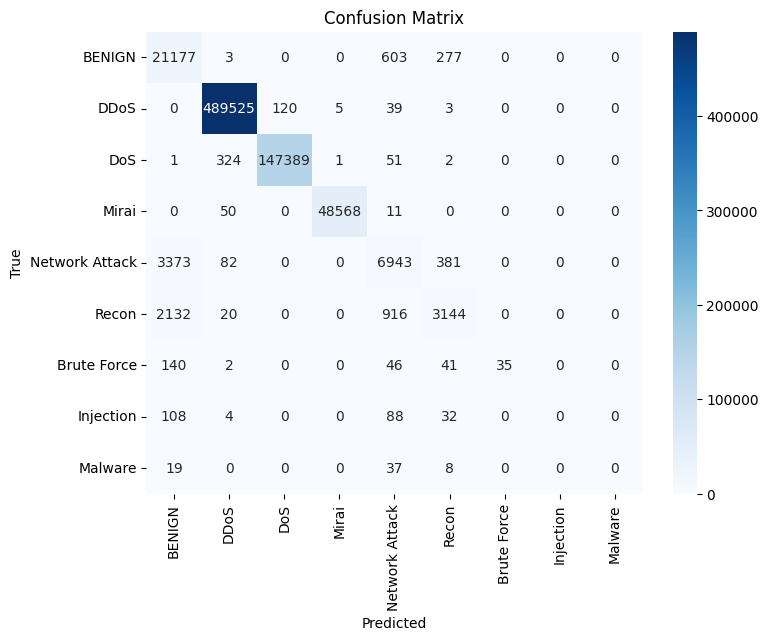

In [18]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Membuat plot confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
